<a href="https://colab.research.google.com/github/fiqnadzrii/Machine-Learning/blob/main/Vehicle_Detection_using_SSD_MobileNet_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle Detection using SSD MobileNet V2

SSD MobileNet V2 is a fast and efficient object detection model that combines
the SSD framework with the MobileNet V2 architecture. It is designed for real-time detection, making it ideal for mobile and embedded devices. The model is trained on the COCO dataset, which includes vehicles like cars, buses, trucks, and motorcycles. It can detect and classify multiple objects in images, making it perfect for vehicle detection.

In [18]:
# install the required libraries
!pip install tensorflow-hub
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

Vehicle classes in the code - 3, 6, 8, 4 are defined as per COCO dataset or Common Objects in Context, a dataset used for object detection-related tasks. In the COCO dataset, several objects in the images are classified, and each type of object has a unique class ID assigned to it.

Below is the SSD MobileNet V2 model developed using the COCO dataset for training, where each object category is assigned a class ID. The class IDs represented in the code relate to the subsequent vehicle categories:

3 = Car:
6 = Bus:
8 = Truck:
4 = Motorcycle:

# How To Use?
Simply run the program and upload the image you want to detect and the bottom of page, , press the "Choose files" button and select your image"

Saving images (2).jpeg to images (2) (2).jpeg


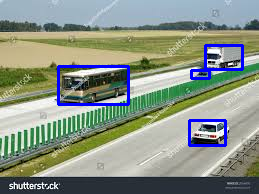

Total Vehicles Detected: 4
Vehicle Type Breakdown: {'Car': 2, 'Bus': 1, 'Truck': 1, 'Motorcycle': 0}


In [19]:
# with this feature, user can decide to upload any picture they want
uploaded = files.upload()

# get the filename of the uploaded image
image_path = list(uploaded.keys())[0]

# load the pre-trained model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
model = hub.load(model_url)

# these are the main functions to perform vehicle detection on the uploaded image
def detect_vehicles(image_path):
    # read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # preprocess
    input_tensor = tf.convert_to_tensor(image_rgb)
    input_tensor = input_tensor[tf.newaxis,...]

    # run detection
    detections = model(input_tensor)

    # extract detection information
    boxes = detections['detection_boxes'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(int)
    scores = detections['detection_scores'][0].numpy()

    return image, boxes, classes, scores

# function to count vehicles and classify them
def count_vehicles_and_types(image_path):
    image, boxes, classes, scores = detect_vehicles(image_path)

    # define vehicle class IDs (COCO dataset class IDs)
    vehicle_classes = [3, 6, 8, 4]  # 3=Car, 6=Bus, 8=Truck, 4=Motorcycle
    vehicle_count = 0
    vehicle_types = {'Car': 0, 'Bus': 0, 'Truck': 0, 'Motorcycle': 0}

    for i in range(len(boxes)):
        if scores[i] > 0.5:  # threshold for detection, adjust accordingly
            class_id = classes[i]
            if class_id in vehicle_classes:
                vehicle_count += 1
                if class_id == 3:
                    vehicle_types['Car'] += 1
                elif class_id == 6:
                    vehicle_types['Bus'] += 1
                elif class_id == 8:
                    vehicle_types['Truck'] += 1
                elif class_id == 4:
                    vehicle_types['Motorcycle'] += 1
                # draw bounding box around detected vehicles
                y_min, x_min, y_max, x_max = boxes[i]
                cv2.rectangle(image, (int(x_min * image.shape[1]), int(y_min * image.shape[0])),
                              (int(x_max * image.shape[1]), int(y_max * image.shape[0])), (255, 0, 0), 2)

    # display the result
    cv2_imshow(image)
    print(f"Total Vehicles Detected: {vehicle_count}")
    print(f"Vehicle Type Breakdown: {vehicle_types}")

# now, run the vehicle detection and counting function
count_vehicles_and_types(image_path)
